# Machine Learning

In [14]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# Read csv file into a pandas DataFrame

suicide = pd.read_csv('who_suicide_statistics_clean.csv')
suicide

,suicides_no,country,year,sex,population
0,854,United States of America,2000,female,19771195
1,871,United States of America,2001,female,19593734
2,909,United States of America,2003,female,19650112
3,911,United States of America,2002,female,19725528
4,912,United States of America,1999,female,19109524
5,924,United States of America,2005,female,19721652
6,932,United States of America,2004,female,19695906
7,932,United States of America,2006,female,19851326
8,961,United States of America,1998,female,19520600
9,988,United States of America,1997,female,19799100


In [16]:
X = suicide[["year", "sex", "population"]]
y = suicide["suicides_no"].values.reshape(-1, 1)
print(X.shape, y.shape)

(74, 3) (74, 1)


In [17]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["sex"])
data_binary_encoded.head()

,year,population,sex_female,sex_male
0,2000,19771195,1,0
1,2001,19593734,1,0
2,2003,19650112,1,0
3,2002,19725528,1,0
4,1999,19109524,1,0


In [18]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,year,population,sex_female,sex_male
0,2000,19771195,1,0
1,2001,19593734,1,0
2,2003,19650112,1,0
3,2002,19725528,1,0
4,1999,19109524,1,0


## Scaling and Normalization

In [19]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,population,sex_female,sex_male
39,2005,20421260,0,1
70,1987,21670000,0,1
16,1992,21212300,1,0
35,1981,19537000,1,0
44,2001,20013572,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

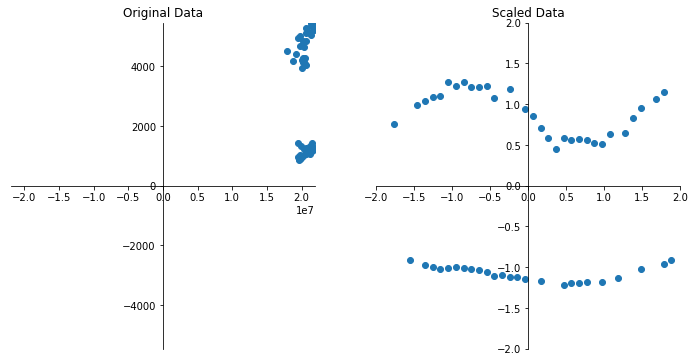

In [22]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["population"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["population"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

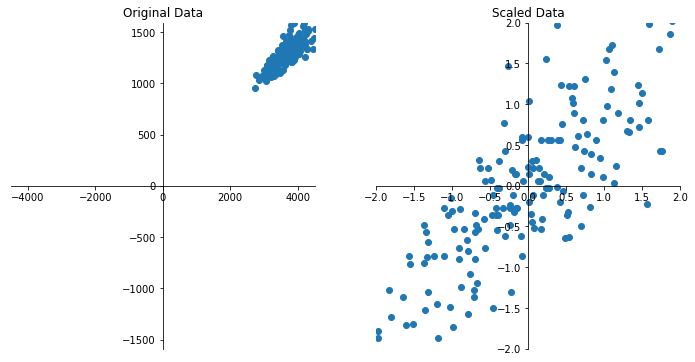

In [10]:
plt.show()

## Putting it all together

In [25]:
X = pd.get_dummies(suicide[["year", "sex", "population"]])
y = suicide["suicides_no"].values.reshape(-1, 1)
X.head()

,year,population,sex_female,sex_male
0,2000,19771195,1,0
1,2001,19593734,1,0
2,2003,19650112,1,0
3,2002,19725528,1,0
4,1999,19109524,1,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

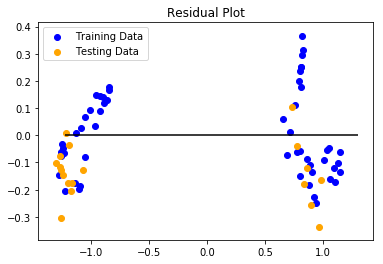

In [28]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.028837482811488926, R2: 0.9722274904638587
